In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/FYDP Dataset/Fraud.csv')
data.head()

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,242.0,302.0,60.0,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,7081.0,46066.0,38985.0,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,16355.0,30355.0,14000.0,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,28-Jan-12,C1439438217,20820.0,39663.0,18843.0,"Lucknow, India",TRANSFER,Gold,Food,F,1
4,16-Apr-14,C892940485,6071.0,35586.0,29515.0,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1


In [ ]:
data

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,242.00,302.0,60.00,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,7081.00,46066.0,38985.00,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,16355.00,30355.0,14000.00,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,28-Jan-12,C1439438217,20820.00,39663.0,18843.00,"Lucknow, India",TRANSFER,Gold,Food,F,1
4,16-Apr-14,C892940485,6071.00,35586.0,29515.00,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1
...,...,...,...,...,...,...,...,...,...,...,...
1048569,20-Jan-14,C1273896430,105150.78,38300000.0,38194849.22,"Kanpur, India",CASH_IN,Platinum,Fuel,F,0
1048570,06-Mar-14,C1450387949,376022.62,38600000.0,38223977.38,"Kanpur, India",CASH_IN,Gold,Grocery,F,0
1048571,13-Mar-13,C1040382471,77083.57,38400000.0,38322916.43,"Jaipur, India",CASH_IN,Gold,Fuel,F,0
1048572,02-Apr-14,C1576842193,121569.82,38400000.0,38278430.18,"Surat, India",CASH_IN,Platinum,Grocery,F,0


In [ ]:
data10 = data.sample(n=10000).reset_index(drop=True)

In [ ]:
data=None

In [ ]:
print(data10.shape)
print(data10['isFraud'].value_counts())

(10000, 11)
isFraud
0    8321
1    1679
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Split the dataset into 5 parts
part1, temp = train_test_split(data10, test_size=0.8, random_state=42)
part2, temp = train_test_split(temp, test_size=0.75, random_state=42)
part3, temp = train_test_split(temp, test_size=2/3, random_state=42)
part4, part5 = train_test_split(temp, test_size=0.5, random_state=42)

# Save each part to a separate CSV file
part1.to_csv('bank1_transactions.csv', index=False)
part2.to_csv('bank2_transactions.csv', index=False)
part3.to_csv('bank3_transactions.csv', index=False)
part4.to_csv('bank4_transactions.csv', index=False)
part5.to_csv('bank5_transactions.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the split datasets
part1 = pd.read_csv('bank1_transactions.csv')
part2 = pd.read_csv('bank2_transactions.csv')
part3 = pd.read_csv('bank3_transactions.csv')
part4 = pd.read_csv('bank4_transactions.csv')
part5 = pd.read_csv('bank5_transactions.csv')

# Combine the datasets
combined_data = pd.concat([part1, part2, part3, part4, part5])

# Convert the Date column to datetime
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Extract features from Date
combined_data['year'] = combined_data['Date'].dt.year
combined_data['month'] = combined_data['Date'].dt.month
combined_data['day'] = combined_data['Date'].dt.day
combined_data['hour'] = combined_data['Date'].dt.hour
combined_data['minute'] = combined_data['Date'].dt.minute
combined_data['second'] = combined_data['Date'].dt.second

# Drop the original Date column
combined_data = combined_data.drop(columns=['Date'])

# Preprocess the data: Encode categorical variables if necessary
combined_data = pd.get_dummies(combined_data, columns=['City', 'type', 'Card Type', 'Exp Type', 'Gender'])

# Separate features and target
X = combined_data.drop(columns=['nameOrig', 'isFraud'])
y = combined_data['isFraud']

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Normalize/Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Train the classifier with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Make predictions
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Cross-validation score
cv_scores = cross_val_score(best_clf, X, y, cv=5)
print(f'Cross-validation Accuracy: {cv_scores.mean()}')


<ipython-input-10-070356d0aa09>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data['Date'] = pd.to_datetime(combined_data['Date'])


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.853
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1655
           1       0.73      0.23      0.35       345

    accuracy                           0.85      2000
   macro avg       0.80      0.61      0.63      2000
weighted avg       0.84      0.85      0.82      2000

Cross-validation Accuracy: 0.8634999999999999


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

y_pred_proba = best_clf.predict_proba(X_test)[:, 1]

Accuracy: 0.853
F1 Score: 0.3524229074889868
AUC-ROC: 0.8747326940759226
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1655
           1       0.73      0.23      0.35       345

    accuracy                           0.85      2000
   macro avg       0.80      0.61      0.63      2000
weighted avg       0.84      0.85      0.82      2000

Cross-validation Accuracy: 0.8634999999999999


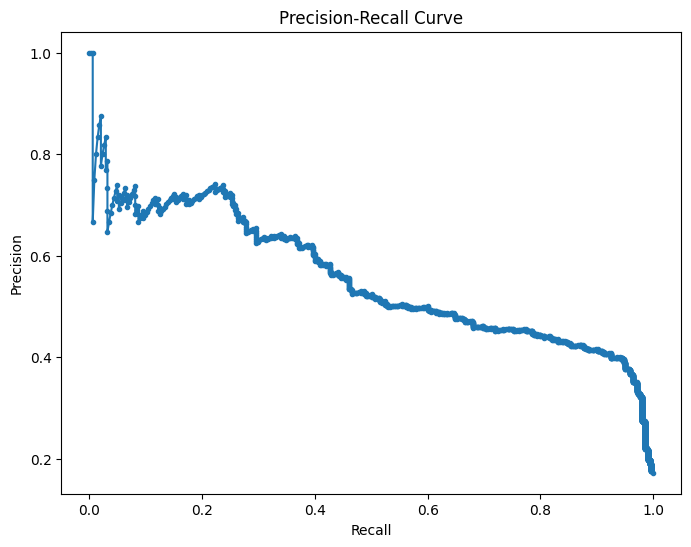

AUC-PR: 0.5547113847649678


In [ ]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'AUC-ROC: {auc_roc}')
print('Classification Report:')
print(report)

# Cross-validation score
cv_scores = cross_val_score(best_clf, X, y, cv=5)
print(f'Cross-validation Accuracy: {cv_scores.mean()}')

# Plotting Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recall_vals, precision_vals)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print(f'AUC-PR: {auc_pr}')

In [ ]:
data10.to_csv('Fraud10k.csv')

In [ ]:
data10=data10.head(1000)

In [ ]:
!pip install tenseal
!pip install secret-sharing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for secret-sharing: filename=secret_sharing-0.2.7-py3-none-any.whl size=5720 sha256=c057b73b1229534082b6fd667291ea2229acc0520c83fbdb06259333c2b87600
  Stored in directory: /root/.cache/pip/wheels/fa/aa/c7/a77333d6dabcfd78f9a3c4c822af0b997d3f01f2f5b798fbf6
  Created wheel for utilitybelt: filename=utilitybelt-0.2.6-py3-none-any.whl size=5566 sha256=77dbaea51cca51e3b3412fc595a25300c37c0e145b49bcc75cedb9a15439986c
  Stored in directory: /root/.cache/pip/wheels/07/49/58/fb1b03edee75e017efb2f5537f0307997273af959d354c34d5
Successfully built secret-sharing utilitybelt


In [ ]:
import pandas as pd
import tenseal as ts
from secretsharing import PlaintextToHexSecretSharer

# Sample data creation
df=data10
data10=None

# Split the dataset into 5 parts
partitions = []
for i in range(5):
    partition = df.iloc[i::5, :].copy()  # Use .copy() to avoid SettingWithCopyWarning
    partitions.append(partition)

# Function to encrypt data
def encrypt_data(partition, context):
    encrypted_data = partition.copy()
    for column in encrypted_data.columns:
        if column == 'transaction_time':
            encrypted_data[column] = encrypted_data[column].apply(lambda x: ts.ckks_vector(context, [x.timestamp()]))
        elif encrypted_data[column].dtype == 'object':
            encrypted_data[column] = encrypted_data[column].apply(lambda x: ts.ckks_vector(context, [hash(x)]))
        else:
            encrypted_data[column] = encrypted_data[column].apply(lambda x: ts.ckks_vector(context, [float(x)]))
    return encrypted_data

# Function to decrypt data (simulating partial decryption)
def decrypt_data(encrypted_data, context):
    decrypted_data = encrypted_data.copy()
    for column in decrypted_data.columns:
        decrypted_data[column] = decrypted_data[column].apply(lambda x: x.decrypt()[0])
        if column == 'transaction_time':
            decrypted_data[column] = pd.to_datetime(decrypted_data[column], unit='s')
    return decrypted_data

# Context setup for CKKS scheme
context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60, 40, 40, 60])
context.global_scale = 2**40
context.generate_galois_keys()

# Generate secret key and split it into shares
secret_key = "supersecretkey"  # This is a placeholder
shares = PlaintextToHexSecretSharer.split_secret(secret_key, 3, 5)

# Encrypt each partition
encrypted_partitions = [encrypt_data(partition, context) for partition in partitions]

# Simulate partial decryption using shares
def combine_shares(shares):
    return PlaintextToHexSecretSharer.recover_secret(shares)

# Use enough shares to simulate final decryption
recovered_key = combine_shares(shares[:3])
print(f"Recovered Key: {recovered_key}")

# Decrypt one partition as a sanity check
decrypted_partition = decrypt_data(encrypted_partitions[0], context)
print(decrypted_partition.head())


Recovered Key: supersecretkey
            Date      nameOrig        amount  oldbalanceOrg  newbalanceOrig  \
0   3.454073e+18 -2.244207e+18  1.356440e+03   1.983500e+04    1.847856e+04   
5  -5.302489e+18 -9.038872e+18  1.337400e+04   1.994100e+04    6.567000e+03   
10 -8.584949e+18 -8.520069e+18  3.451700e+04   4.481000e+04    1.029300e+04   
15  5.150159e+18 -4.258361e+18  6.285000e+03   1.056100e+04    4.276000e+03   
20 -8.922950e+18  8.922372e+18  5.024374e-11  -1.636234e-09    1.817332e-09   

            City          type     Card Type      Exp Type        Gender  \
0   1.278402e+18 -9.166147e+18  3.267775e+18  7.529821e+18  9.086478e+18   
5  -7.913755e+18 -5.055670e+18  3.606700e+18 -7.234452e+18 -9.014148e+18   
10 -7.050521e+17 -5.055670e+18  3.606700e+18 -4.480649e+18  9.086478e+18   
15 -6.942167e+18  8.606384e+18  3.267775e+18  5.004408e+18  9.086478e+18   
20  2.382707e+18 -5.055670e+18 -4.609275e+18 -7.234452e+18  9.086478e+18   

         isFraud  
0  -9.832503e-11  
